# **Import required libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing libraries
import numpy as np # linear algebra
from numpy import math
import pandas as pd # data processing
import nltk # Natural Lanauge Toolkit, package used for NLP
import re # package to work with regular expressions
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer converts text to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # spilts existing data into training and testing data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt # low level graph plotting library that helps in visualization
import seaborn as sns # visualization library based on matplotlib
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Restaurant_Reviews.tsv', delimiter='\t' , quoting=3)


# **Exploratory Data Analysis**

In [ ]:
data.shape


In [ ]:
data.columns


In [ ]:
data.head()

In [ ]:
data.info

### **Data Preprocessing**

In [ ]:
stopwords.words('english')

In [ ]:
corpus =[]
for i in range(0,1000):
   review =re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])

   review = review.lower()
   review_words = review.split()
   review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

   ps= PorterStemmer()
   review =[ps.stem(word) for word in review_words]

   review = ' '.join(review)
   corpus.append(review)

In [ ]:
corpus[:1500]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X =cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=0)

In [ ]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# **Data Training**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

## **Multinomial Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

In [ ]:
y_pred = mnb.predict(X_test)

y_pred

In [ ]:
score1 = accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("Recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 76.5%
Precision score is 76.5%
Recall score is 78.641%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

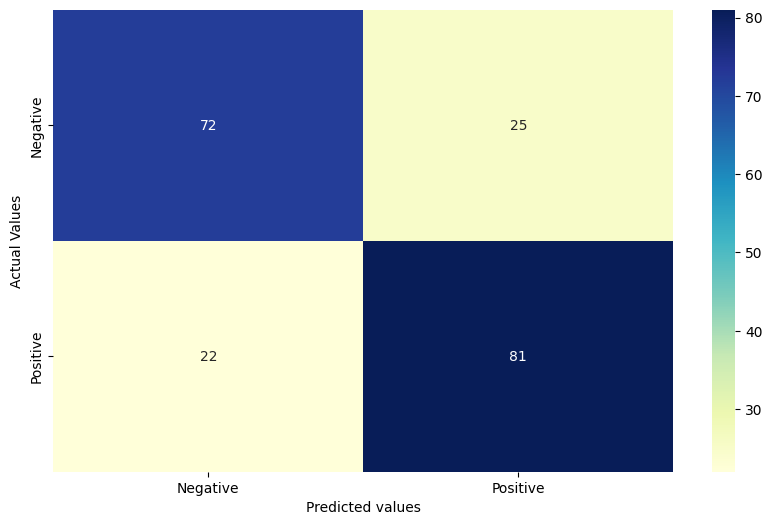

In [ ]:
%matplotlib inline

plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

### **Hyperparameter Tuning**

In [ ]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_mnb = MultinomialNB(alpha=i)
  temp_mnb.fit(X_train,y_train)
  temp_y_pred = temp_mnb.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy = score
     alpha_val = i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 78.0%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 78.0%
Accuracy Score for alpha=0.4 is 78.0%
Accuracy Score for alpha=0.5 is 77.5%
Accuracy Score for alpha=0.6 is 77.5%
Accuracy Score for alpha=0.7 is 77.5%
Accuracy Score for alpha=0.8 is 77.0%
Accuracy Score for alpha=0.9 is 76.5%
Accuracy Score for alpha=1.0 is 76.5%
----------------------------------------------------
The Best Accuracy Score is 78.5% with alpha value as 0.2


In [ ]:
mnb =MultinomialNB(alpha=0.2)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

## **Gaussian Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

In [ ]:
score1 = accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("Recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 73.0%
Precision score is 73.0%
Recall score is 88.35%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 42],
       [12, 91]])

### **Hyperparameter Tuning**

In [ ]:

best_accuracy = 0.0
alpha_val = 0.0

for i in np.arange(0.1, 1.1, 0.1):
    gnb = GaussianNB(var_smoothing=i)
    gnb.fit(X_train, y_train)
    temp_y_pred = gnb.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy Score for alpha={} is {}%".format(round(i, 1), round(score * 100, 3)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i

print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha as {}".format(round(best_accuracy * 100, 2), round(alpha_val, 1)))


Accuracy Score for alpha=0.1 is 72.5%
Accuracy Score for alpha=0.2 is 69.5%
Accuracy Score for alpha=0.3 is 68.5%
Accuracy Score for alpha=0.4 is 66.0%
Accuracy Score for alpha=0.5 is 62.5%
Accuracy Score for alpha=0.6 is 61.5%
Accuracy Score for alpha=0.7 is 60.0%
Accuracy Score for alpha=0.8 is 58.5%
Accuracy Score for alpha=0.9 is 58.5%
Accuracy Score for alpha=1.0 is 58.5%
----------------------------------------------------
The Best Accuracy Score is 72.5% with alpha as 0.1


In [ ]:
gnb = GaussianNB(var_smoothing=0.1)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.1)

## **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

y_pred

In [ ]:
score1 = accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("Recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 71.0%
Precision score is 71.0%
Recall score is 64.078%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 21],
       [37, 66]])

### **Hyperparameter Tuning**

In [ ]:
best_accuracy = 0.0
best_C = 0.0

for i in np.arange(0.1, 1.1, 0.1):
    lr = LogisticRegression(C=i)  # Use C instead of alpha
    lr.fit(X_train, y_train)
    temp_y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy Score for alpha={} is {}%".format(round(i, 1), round(score * 100, 3)))
    if score > best_accuracy:
        best_accuracy = score
        best_C = i

print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy * 100, 2), round(best_C, 1)))


Accuracy Score for alpha=0.1 is 74.0%
Accuracy Score for alpha=0.2 is 74.0%
Accuracy Score for alpha=0.3 is 73.0%
Accuracy Score for alpha=0.4 is 71.5%
Accuracy Score for alpha=0.5 is 72.0%
Accuracy Score for alpha=0.6 is 72.0%
Accuracy Score for alpha=0.7 is 71.0%
Accuracy Score for alpha=0.8 is 71.0%
Accuracy Score for alpha=0.9 is 71.0%
Accuracy Score for alpha=1.0 is 71.0%
----------------------------------------------------
The Best Accuracy Score is 74.0% with alpha value as 0.1


In [ ]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

## **Random Forest Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
score1 = accuracy_score(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("---------SCORES--------")
print("Accuracy score is {}%".format(round(score1*100,3)))
print("Precision score is {}%".format(round(score2*100,3)))
print("Recall score is {}%".format(round(score3*100,3)))

---------SCORES--------
Accuracy score is 69.0%
Precision score is 69.0%
Recall score is 53.398%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[83, 14],
       [48, 55]])

### **Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust these values
    'max_depth': [None, 10, 20],     # You can adjust these values
}

best_accuracy = 0.0
best_params = {}

# Create the random forest classifier
rf_classifier = RandomForestClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

print("The Best Accuracy Score is {}%".format(round(best_accuracy * 100, 2)))
print("Best Hyperparameters:", best_params)


The Best Accuracy Score is 73.5%
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}


In [ ]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

# **Predictions**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return mnb.predict(temp)

In [ ]:
sample_review = input()
if predict_sentiment(sample_review):
  print("Positive review")

else:
  print("Negative review")

food is bad
Negative review
